In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 03: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [3]:
# Aqui va su código

import numpy as np
import math

#a. Defina una función que a partir de la serie de Taylor y un valor de  x  en radianes encuentre el valor de  sin(x)
def taylor_sin(x, k, dtype=np.float64):
    sin_x = dtype(0.0)
    for n in range(k):
        term = ((-1) ** n) * (x ** (2 * n + 1)) / math.factorial(2 * n + 1)
        sin_x += dtype(term)
    return sin_x

#b. Usando  x  como float32 encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al  ϵ  de la máquina para dicho tipo de variable. Para el valor exacto use math.sin().
def convergence_float32(x, epsilon=np.finfo(np.float32).eps):
    exact_value = math.sin(x)
    k = 0
    approx_value = 0.0
    error = abs(exact_value - approx_value)

    while error > epsilon:
        term = ((-1) ** k) * (x ** (2 * k + 1)) / math.factorial(2 * k + 1)
        approx_value += np.float32(term)
        error = abs(exact_value - approx_value)
        k += 1

    return k, approx_value, error

#c. Ahora, usando  x  como float64 encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al  ϵ  de la máquina para dicho tipo de variable. Para el valor exacto use math.sin().
def convergence_float64(x, epsilon=np.finfo(np.float64).eps):
    exact_value = math.sin(x)
    k = 0
    approx_value = 0.0
    error = abs(exact_value - approx_value)

    while error > epsilon:
        term = ((-1) ** k) * (x ** (2 * k + 1)) / math.factorial(2 * k + 1)
        approx_value += np.float64(term)
        error = abs(exact_value - approx_value)
        k += 1

    return k, approx_value, error

#d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

def calcular_error_porcentual(valor_exacto, valor_aproximado):
    return abs((valor_exacto - valor_aproximado) / valor_exacto) * 100

x = np.float32(np.pi / 4)


k_float32, approx_float32, error_float32 = convergence_float32(x)
print(f"Con {k_float32} términos de la serie (float32), la aproximación de sin({x}) es: {approx_float32}")
print(f"Error absoluto: {error_float32}\n")

Con 5 términos de la serie (float32), la aproximación de sin(0.7853981852531433) es: 0.7071067991791153
Error absoluto: 2.5382578261456956e-09



#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

Aproximación de e^(-1) usando la serie de Taylor con N=11: 0.367879439233606
Valor exacto de e^(-1) con np.exp: 0.36787944117144233
Error absoluto: 1.9378363358413253e-09

n=0, término=1.0
n=1, término=-10.0
n=2, término=50.0
n=3, término=-166.66666666666666
n=4, término=416.6666666666667
n=5, término=-833.3333333333334
n=6, término=1388.888888888889
n=7, término=-1984.126984126984
n=8, término=2480.15873015873
n=9, término=-2755.731922398589
n=10, término=2755.731922398589
n=11, término=-2505.210838544172
n=12, término=2087.67569878681
n=13, término=-1605.9043836821616
n=14, término=1147.0745597729724
n=15, término=-764.7163731819817
n=16, término=477.9477332387385
n=17, término=-281.14572543455205
n=18, término=156.19206968586226
n=19, término=-82.2063524662433
n=20, término=41.10317623312165
Aproximación de e^(-10) usando 1/exp(x): 4.539992976248485e-05
Valor exacto de e^(-10) con np.exp: 4.5399929762484854e-05
Error absoluto: 6.776263578034403e-21

x=1, N=11, Aproximación=0.3678794

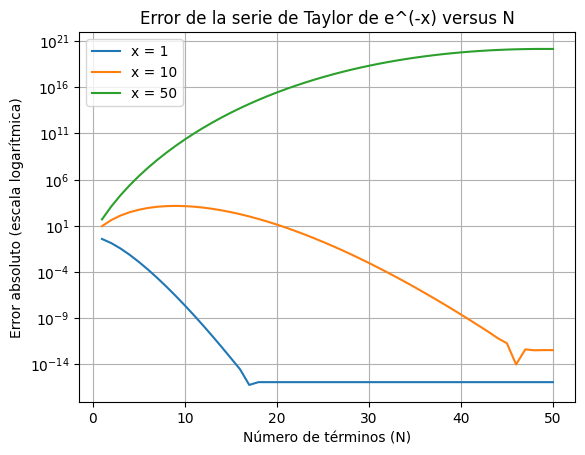

In [4]:
# Aqui va su código

#a. Calcula la serie para x ≤ 1 y compárela con la función incorporada np.exp(x)
def taylor_exp_neg(x, N):
    sum_exp = 0.0
    for n in range(N + 1):
        term = ((-1) ** n) * (x ** n) / math.factorial(n)
        sum_exp += term
    return sum_exp

def find_N_for_precision(x, epsilon=1e-7):
    N = 0
    sum_exp = 0.0
    term = ((-1) ** N) * (x ** N) / math.factorial(N)
    while abs(term) > epsilon * abs(sum_exp):
        sum_exp += term
        N += 1
        term = ((-1) ** N) * (x ** N) / math.factorial(N)
    return N

x = 1
N = find_N_for_precision(x)
approx_exp_neg_x = taylor_exp_neg(x, N)
exact_exp_neg_x = np.exp(-x)
error = abs(approx_exp_neg_x - exact_exp_neg_x)
print(f"Aproximación de e^(-{x}) usando la serie de Taylor con N={N}: {approx_exp_neg_x}")
print(f"Valor exacto de e^(-{x}) con np.exp: {exact_exp_neg_x}")
print(f"Error absoluto: {error}\n")

#b. Examinar la cancelación sustractiva para x ≈ 10
x_large = 10
N_large = 20  # Se elige un N arbitrario para observar las cancelaciones
for n in range(N_large + 1):
    term = ((-1) ** n) * (x_large ** n) / math.factorial(n)
    print(f"n={n}, término={term}")

#c. Usar e^(-x) = 1 / exp(x) para evitar cancelación sustractiva
def exp_neg_x_better(x):
    return 1 / np.exp(x)

approx_exp_neg_x_better = exp_neg_x_better(x_large)
exact_exp_neg_x_large = np.exp(-x_large)
error_better = abs(approx_exp_neg_x_better - exact_exp_neg_x_large)
print(f"Aproximación de e^(-{x_large}) usando 1/exp(x): {approx_exp_neg_x_better}")
print(f"Valor exacto de e^(-{x_large}) con np.exp: {exact_exp_neg_x_large}")
print(f"Error absoluto: {error_better}\n")

#d. Incrementar x y determinar cuándo la serie pierde precisión
for x in [1, 10, 50, 100]:
    N = find_N_for_precision(x)
    approx_exp_neg_x = taylor_exp_neg(x, N)
    exact_exp_neg_x = np.exp(-x)
    error = abs(approx_exp_neg_x - exact_exp_neg_x)
    print(f"x={x}, N={N}, Aproximación={approx_exp_neg_x}, Error={error}")

#e. Graficar el error versus N para diferentes valores de x
import matplotlib.pyplot as plt

x_values = [1, 10, 50]
N_max = 50
for x in x_values:
    errors = []
    for N in range(1, N_max + 1):
        approx_exp_neg_x = taylor_exp_neg(x, N)
        exact_exp_neg_x = np.exp(-x)
        error = abs(approx_exp_neg_x - exact_exp_neg_x)
        errors.append(error)

    plt.plot(range(1, N_max + 1), errors, label=f"x = {x}")

plt.yscale('log')
plt.title("Error de la serie de Taylor de e^(-x) versus N")
plt.xlabel("Número de términos (N)")
plt.ylabel("Error absoluto (escala logarítmica)")
plt.legend()
plt.grid(True)
plt.show()


# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

S(1)(1000000) = 0.3068523194407454
S(2)(1000000) = -1999986.4141253373
S(3)(1000000) = 0.306852569440241


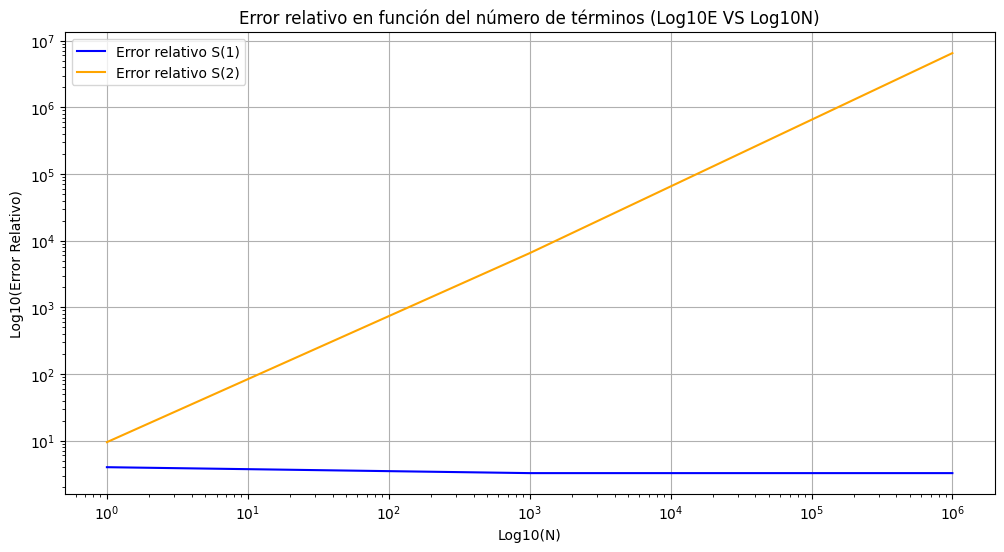

In [6]:
# Aqui va su código

import numpy as np
import matplotlib.pyplot as plt

#a. Funciones para calcular S(1)N, S(2)N y S(3)N
def S1(N):
    return sum((-1)**n * n / (n + 1) for n in range(1, N + 1))

def S2(N):
    even_sum = sum((-1)**(2*n) * (2*n) / (2*n + 1) for n in range(1, N + 1))
    odd_sum = sum((-1)**(2*n + 1) * (2*n + 1) / (2*n + 2) for n in range(1, N + 1))
    return -even_sum + odd_sum

def S3(N):
    return sum(1 / (2*n * (2*n + 1)) for n in range(1, N + 1))

#b. Estudio de la convergencia de la serie
def study_convergence(N):
    s1 = S1(N)
    s2 = S2(N)
    s3 = S3(N)
    return s1, s2, s3

N = 10**6
s1_value, s2_value, s3_value = study_convergence(N)
print(f"S(1)({N}) = {s1_value}")
print(f"S(2)({N}) = {s2_value}")
print(f"S(3)({N}) = {s3_value}")

#c. Gráficos log-log del error relativo
def relative_error(approx, exact):
    return abs((approx - exact) / exact)

N_values = np.arange(1, N + 1, 1000)  # Pasos para N
errors_S1 = []
errors_S2 = []

for n in N_values:
    s1_n = S1(n)
    s2_n = S2(n)
    s3_n = S3(n)
    errors_S1.append(relative_error(s1_n, s3_n))
    errors_S2.append(relative_error(s2_n, s3_n))

# Graficar los errores relativos
plt.figure(figsize=(12, 6))
plt.loglog(N_values, errors_S1, label='Error relativo S(1)', color='blue')
plt.loglog(N_values, errors_S2, label='Error relativo S(2)', color='orange')
plt.title('Error relativo en función del número de términos (Log10E VS Log10N)')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(Error Relativo)')
plt.legend()
plt.grid(True)
plt.show()
